# Лабораторная работа № 3
## Регрессионный анализ
### Вариант 8

**Цель работы:** изучение алгоритмов и методов регрессии на практике

**Выполнил:** Семенов Иван Александрович

**Группа:** 4317

**Дата:** 30.10.2025

## Импорт необходимых библиотек

Для начала необходимо импортировать все библиотеки, с которыми будет производиться работа:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# Часть 1. Простая линейная регрессия

Работа с файлом `regression.xlsx`, лист `var8`.

### 1.1. Загрузка и изучение данных

Для Части 1 и Части 2 загружается в DataFrame файл regression.xlsx:

In [14]:
# Загрузка данных для варианта 8
df = pd.read_excel('C:\\Users\\vanya\\OneDrive\\Desktop\\датасеты_3_лр\\regression.xlsx', sheet_name='var8')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (1000, 3)

Первые 5 строк:
         x1        x2         y
0 -1.655715  1.204577  2.777909
1 -0.461736  1.494205  0.594868
2  0.823418 -1.024070 -1.414032
3  0.900855  0.440111  0.104884
4  0.511414 -1.753043 -1.387142

Описательная статистика:
                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean     -0.000022    -0.000007     0.410619
std       1.155247     1.155279     1.060836
min      -1.997303    -1.997321    -2.248191
25%      -0.999690    -0.998046    -0.380555
50%       0.000496     0.000916     0.360079
75%       0.999608     0.998926     1.156562
max       1.997211     1.999558     4.077373


### 1.2. Предобработка данных

Полученные данные подвергаются предобработке (удаляются нулевые значения, а также явные дубликаты):

In [15]:
print("Пропущенные значения:")
print(df.isnull().sum())
print("\nНулевые значения:")
print((df == 0).sum())
duplicates_count = df.duplicated().sum()
print(f"\nЯвные дубликаты: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
print(f"\nФинальный размер: {df.shape}")

Пропущенные значения:
x1    0
x2    0
y     0
dtype: int64

Нулевые значения:
x1    0
x2    0
y     0
dtype: int64

Явные дубликаты: 0

Финальный размер: (1000, 3)


### 1.3. Визуализация данных

С начала отображается зависимость 'y' от 'x1', затем от 'x2'. Далее строится матрица корреляций:

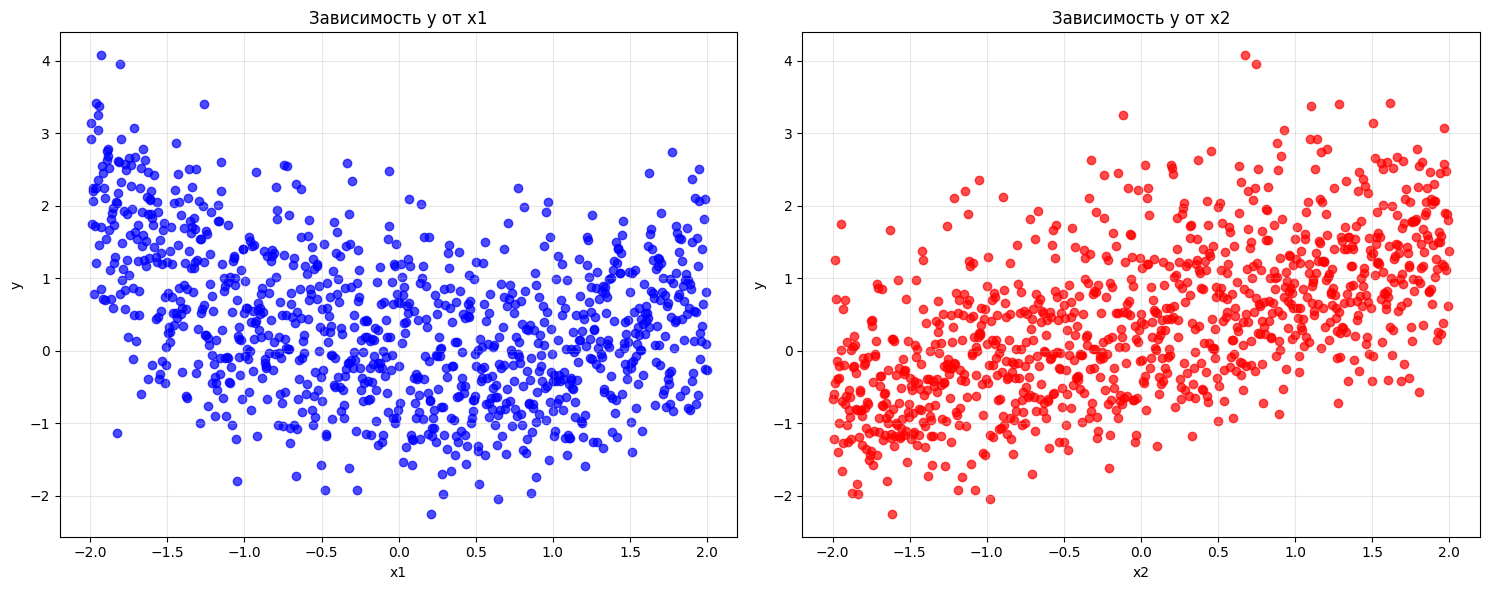


Корреляционная матрица:
          x1        x2         y
x1  1.000000 -0.014992 -0.333697
x2 -0.014992  1.000000  0.593267
y  -0.333697  0.593267  1.000000


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df['x1'], df['y'], alpha=0.7, color='blue')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('y')
axes[0].set_title('Зависимость y от x1')
axes[0].grid(True, alpha=0.3)
axes[1].scatter(df['x2'], df['y'], alpha=0.7, color='red')
axes[1].set_xlabel('x2')
axes[1].set_ylabel('y')
axes[1].set_title('Зависимость y от x2')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\nКорреляционная матрица:")
print(df.corr())

### 1.4. Построение моделей простой линейной регрессии

Далее строится модель линейной регрессии, основная суть которой вычислить приблизительное значение коэффициентов a и b таких, что график функции y = ax + b будет обладать таким свойством, что сумма расстояний от точек до прямой будет минимальным:

In [17]:
y = df['y']
X1 = df[['x1']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=0)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
print("МОДЕЛЬ 1: y от x1")
print(f"Коэффициент a = {model1.coef_[0]:.6f}")
print(f"Свободный член b = {model1.intercept_:.6f}")
print(f"\nУравнение: y = {model1.coef_[0]:.6f} * x1 + {model1.intercept_:.6f}")

МОДЕЛЬ 1: y от x1
Коэффициент a = -0.311841
Свободный член b = 0.380708

Уравнение: y = -0.311841 * x1 + 0.380708


In [18]:
X2 = df[['x2']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=0)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
print("МОДЕЛЬ 2: y от x2")
print(f"Коэффициент a = {model2.coef_[0]:.6f}")
print(f"Свободный член b = {model2.intercept_:.6f}")
print(f"\nУравнение: y = {model2.coef_[0]:.6f} * x2 + {model2.intercept_:.6f}")

МОДЕЛЬ 2: y от x2
Коэффициент a = 0.552094
Свободный член b = 0.382108

Уравнение: y = 0.552094 * x2 + 0.382108


### 1.5. Создание датафреймов с результатами

Итоговая модель с результатами:

In [19]:
results_model1 = pd.DataFrame({
    'Истинные значения': y1_test.values,
    'Предсказанные значения': y1_pred,
    'Разность': y1_test.values - y1_pred
})
print("РЕЗУЛЬТАТЫ МОДЕЛИ 1:")
print(results_model1)

РЕЗУЛЬТАТЫ МОДЕЛИ 1:
     Истинные значения  Предсказанные значения  Разность
0            -0.395571                0.020166 -0.415737
1             0.893850               -0.032986  0.926837
2             0.633611                0.773450 -0.139839
3            -1.155219                0.246771 -1.401990
4             1.176699                0.356892  0.819807
..                 ...                     ...       ...
245           0.784664                0.384325  0.400339
246           0.993012               -0.167211  1.160223
247          -1.414032                0.123932 -1.537964
248           1.670966                0.966218  0.704748
249           1.839032                0.878368  0.960664

[250 rows x 3 columns]


In [20]:
results_model2 = pd.DataFrame({
    'Истинные значения': y2_test.values,
    'Предсказанные значения': y2_pred,
    'Разность': y2_test.values - y2_pred
})
print("РЕЗУЛЬТАТЫ МОДЕЛИ 2:")
print(results_model2)

РЕЗУЛЬТАТЫ МОДЕЛИ 2:
     Истинные значения  Предсказанные значения  Разность
0            -0.395571                1.267424 -1.662995
1             0.893850               -0.170788  1.064638
2             0.633611                0.106054  0.527557
3            -1.155219               -0.532940 -0.622279
4             1.176699                1.133324  0.043375
..                 ...                     ...       ...
245           0.784664                1.120814 -0.336150
246           0.993012                0.999788 -0.006777
247          -1.414032               -0.183275 -1.230757
248           1.670966               -0.517545  2.188511
249           1.839032                0.248457  1.590575

[250 rows x 3 columns]


### 1.6. Оценка качества моделей

Для оценки качества модели используются следующие критерии: MSE (Mean Square Error), MAE (Mean Absolut Error), RMSE(Root Mean Square Error), также R^2, показывающий долю изменчивости целевой переменной.

In [21]:
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, y1_pred)
print("МЕТРИКИ МОДЕЛИ 1:")
print(f"MSE:  {mse1:.6f}")
print(f"MAE:  {mae1:.6f}")
print(f"RMSE: {rmse1:.6f}")
print(f"R²:   {r2_1:.6f}")

МЕТРИКИ МОДЕЛИ 1:
MSE:  1.057472
MAE:  0.856252
RMSE: 1.028334
R²:   0.095241


In [22]:
mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)
print("МЕТРИКИ МОДЕЛИ 2:")
print(f"MSE:  {mse2:.6f}")
print(f"MAE:  {mae2:.6f}")
print(f"RMSE: {rmse2:.6f}")
print(f"R²:   {r2_2:.6f}")

МЕТРИКИ МОДЕЛИ 2:
MSE:  0.791463
MAE:  0.692000
RMSE: 0.889642
R²:   0.322834


Чтобы оценить, насколько модель справляется с задачей достаточно понимать, что все параметры, кроме R^2 являются наилучшим при значении 0. То есть чем ближе MSE, MAE и RMSE к нулю, тем точнее результаты исследования. Однако для оценки R^2 необходимо смотреть приближение значения к единицы.

### 1.7. Визуализация моделей

Изобразим линию регрессии каждой из моделей на графике вместе со всеми тестовыми значениями:

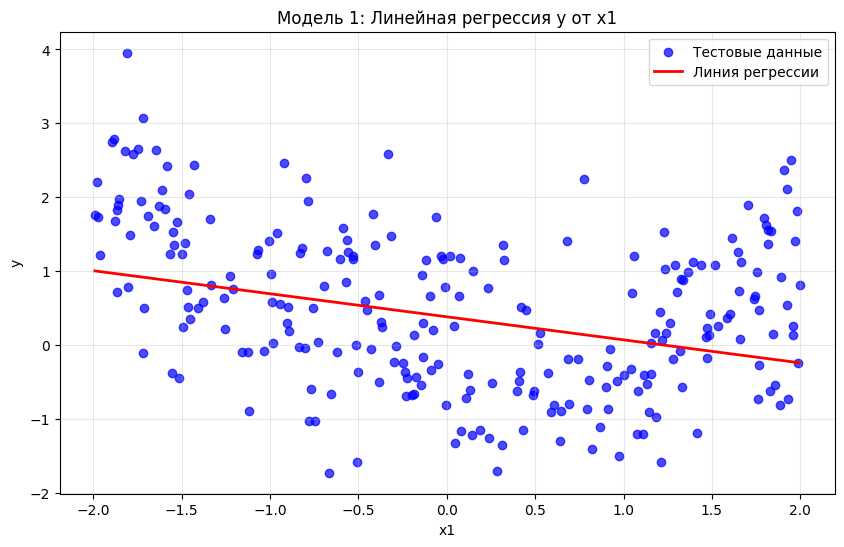

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X1_test, y1_test, alpha=0.7, color='blue', label='Тестовые данные')
x1_line = np.linspace(X1_test.min().values[0], X1_test.max().values[0], 100)
y1_line = model1.coef_[0] * x1_line + model1.intercept_
plt.plot(x1_line, y1_line, color='red', linewidth=2, label='Линия регрессии')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Модель 1: Линейная регрессия y от x1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

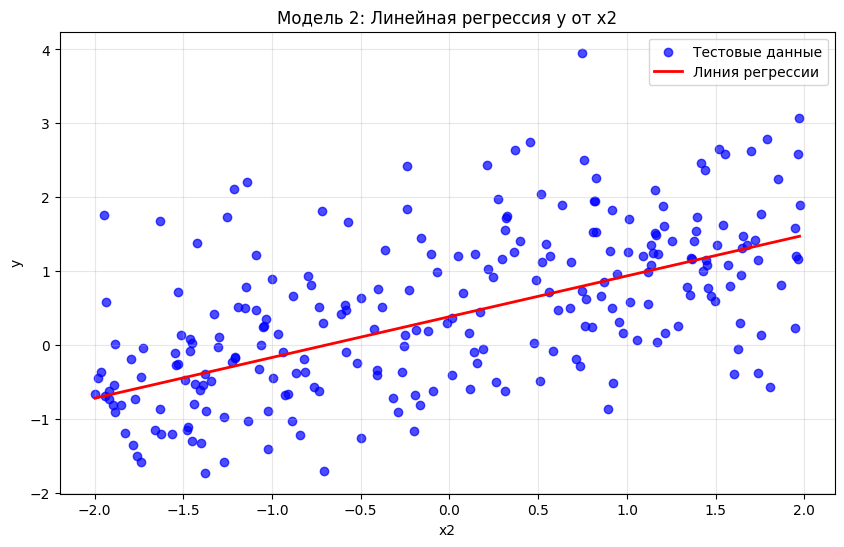

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X2_test, y2_test, alpha=0.7, color='blue', label='Тестовые данные')
x2_line = np.linspace(X2_test.min().values[0], X2_test.max().values[0], 100)
y2_line = model2.coef_[0] * x2_line + model2.intercept_
plt.plot(x2_line, y2_line, color='red', linewidth=2, label='Линия регрессии')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Модель 2: Линейная регрессия y от x2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.8. Scatter plot: Предсказанные vs Истинные значения

Построим график, где ось Х - тестовые (изначальные данные) значения y, ось y - предсказанные значения. То есть в идеальном случае требуется получить график y=x:

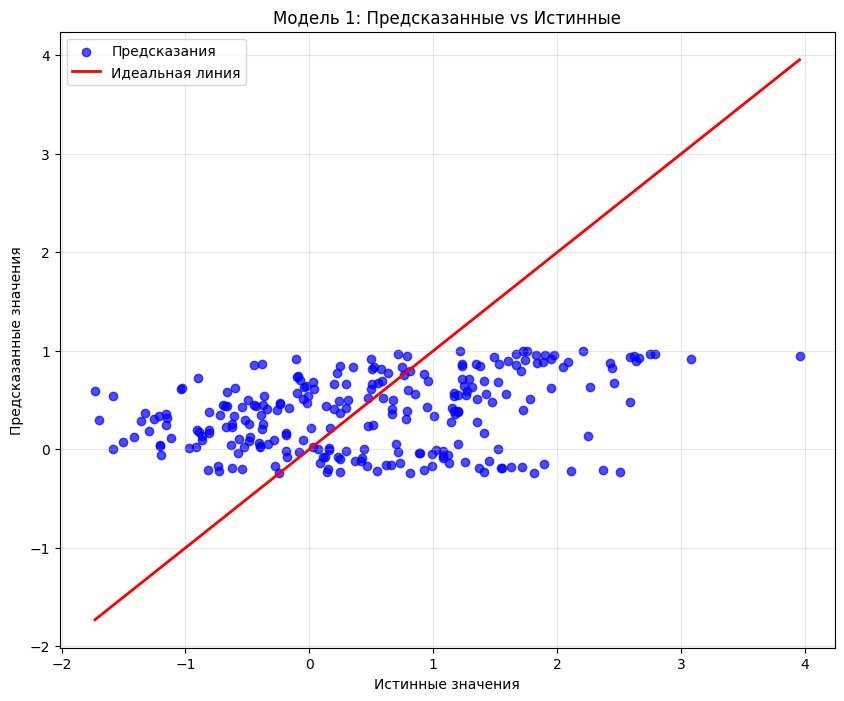

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(y1_test, y1_pred, alpha=0.7, color='blue', label='Предсказания')
min_val = min(y1_test.min(), y1_pred.min())
max_val = max(y1_test.max(), y1_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Идеальная линия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Модель 1: Предсказанные vs Истинные')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

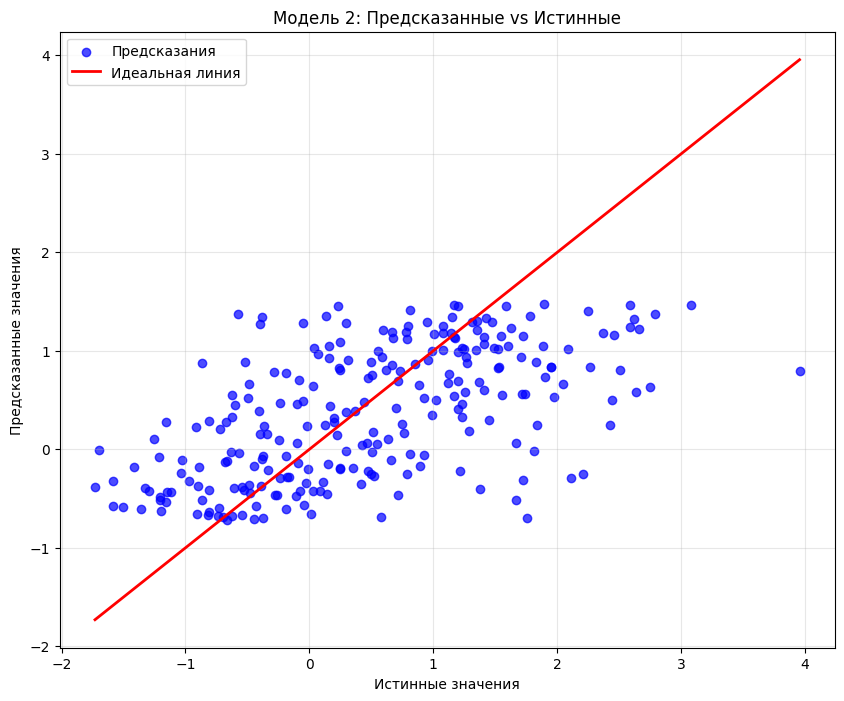

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y2_test, y2_pred, alpha=0.7, color='blue', label='Предсказания')
min_val = min(y2_test.min(), y2_pred.min())
max_val = max(y2_test.max(), y2_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Идеальная линия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Модель 2: Предсказанные vs Истинные')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.9. Выводы по части 1

Обе модели показывают общий линейный тренд и имеют терпимые отклонения, учитывая степень разброса данных

# Часть 2. Полиномиальная регрессия

Поскольку требуется улучшить способность предсказывать верные значения, то следует выбрать модель, чьи предсказательные способности хуже другой. Для этого выводится оценка R^2:

### 2.1. Выбор переменной

In [30]:
print("Сравнение моделей:")
print(f"Модель 1 (x1): R² = {r2_1:.6f}")
print(f"Модель 2 (x2): R² = {r2_2:.6f}")
if r2_1 <= r2_2:
    X_poly = df[['x1']].copy()
    selected_var = 'x1'
    print("\nВыбрана: x1")
else:
    X_poly = df[['x2']].copy()
    selected_var = 'x2'
    print("\nВыбрана: x2")
y_poly = df['y'].copy()
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y_poly, test_size=0.25, random_state=42)

Сравнение моделей:
Модель 1 (x1): R² = 0.095241
Модель 2 (x2): R² = 0.322834

Выбрана: x1


Для наиболее качественных выводов рассматриваются полиноминальные модели с степенями от 1 до 6. То есть от полиномов y = ax + b; до полиномов y = ax^6 + ... + fx + g:

### 2.2-2.7. Полиномиальные модели степеней 1-6

In [40]:
results_all_degrees = {}
for degree in range(1, 7):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train_deg = poly_features.fit_transform(X_poly_train)
    X_poly_test_deg = poly_features.transform(X_poly_test)
    model_poly = LinearRegression()
    model_poly.fit(X_poly_train_deg, y_poly_train)
    y_pred_deg = model_poly.predict(X_poly_test_deg)
    mae_deg = mean_absolute_error(y_poly_test, y_pred_deg)
    r2_deg = r2_score(y_poly_test, y_pred_deg)
    results_all_degrees[degree] = {
        'model': model_poly,
        'poly_features': poly_features,
        'y_pred': y_pred_deg,
        'mae': mae_deg,
        'r2': r2_deg
    }
    print(f"Степень {degree}: MAE = {mae_deg:.6f}, R² = {r2_deg:.6f}")

<class 'numpy.ndarray'>
Степень 1: MAE = 0.771974, R² = 0.127499
<class 'numpy.ndarray'>
Степень 2: MAE = 0.680736, R² = 0.293313
<class 'numpy.ndarray'>
Степень 3: MAE = 0.680763, R² = 0.291472
<class 'numpy.ndarray'>
Степень 4: MAE = 0.683975, R² = 0.290115
<class 'numpy.ndarray'>
Степень 5: MAE = 0.683874, R² = 0.293701
<class 'numpy.ndarray'>
Степень 6: MAE = 0.683753, R² = 0.293913


### 2.8. Сравнение моделей

Отобразим графически результаты:

СРАВНЕНИЕ:
 Степень      MAE       R²
       1 0.771974 0.127499
       2 0.680736 0.293313
       3 0.680763 0.291472
       4 0.683975 0.290115
       5 0.683874 0.293701
       6 0.683753 0.293913


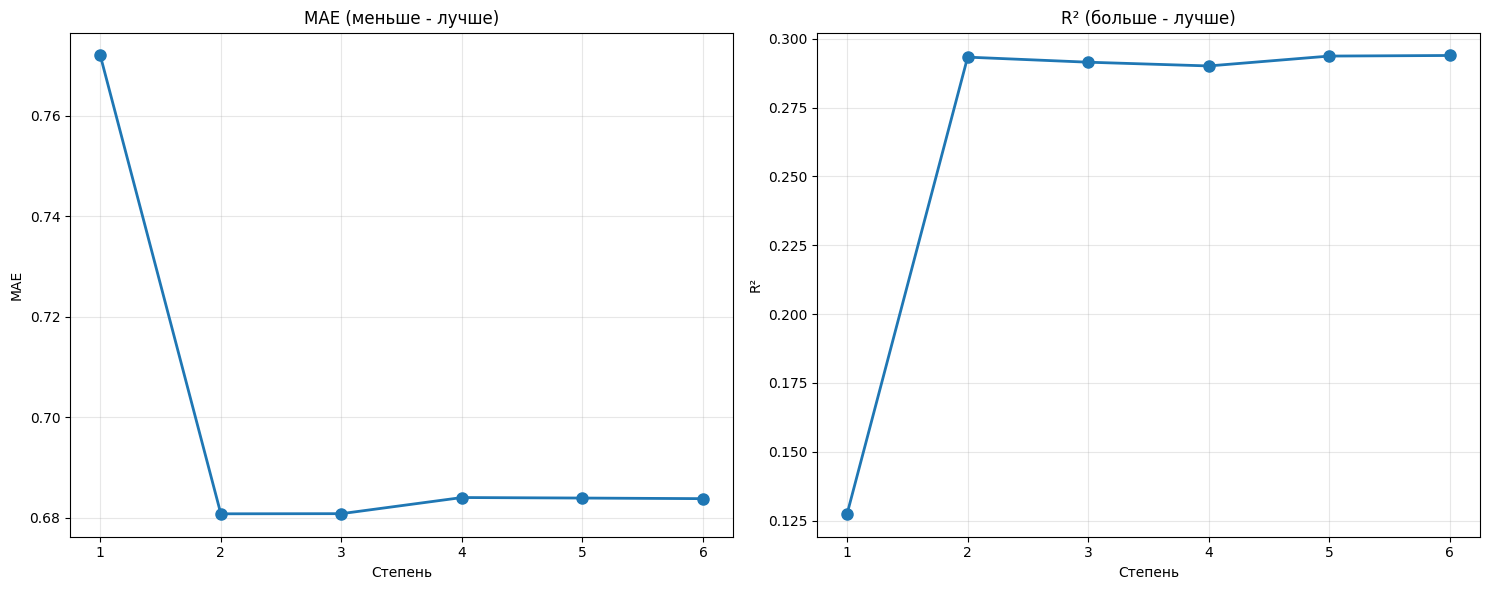

In [32]:
comparison_data = []
for degree in range(1, 7):
    comparison_data.append({
        'Степень': degree,
        'MAE': results_all_degrees[degree]['mae'],
        'R²': results_all_degrees[degree]['r2']
    })
comparison_df = pd.DataFrame(comparison_data)
print("СРАВНЕНИЕ:")
print(comparison_df.to_string(index=False))
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(comparison_df['Степень'], comparison_df['MAE'], marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Степень')
axes[0].set_ylabel('MAE')
axes[0].set_title('MAE (меньше - лучше)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 7))
axes[1].plot(comparison_df['Степень'], comparison_df['R²'], marker='o', linewidth=2, markersize=8)
axes[1].set_xlabel('Степень')
axes[1].set_ylabel('R²')
axes[1].set_title('R² (больше - лучше)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 7))
plt.tight_layout()
plt.show()

### 2.9. Визуализация всех моделей

C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\vanya\OneDrive\Desktop\Lab1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

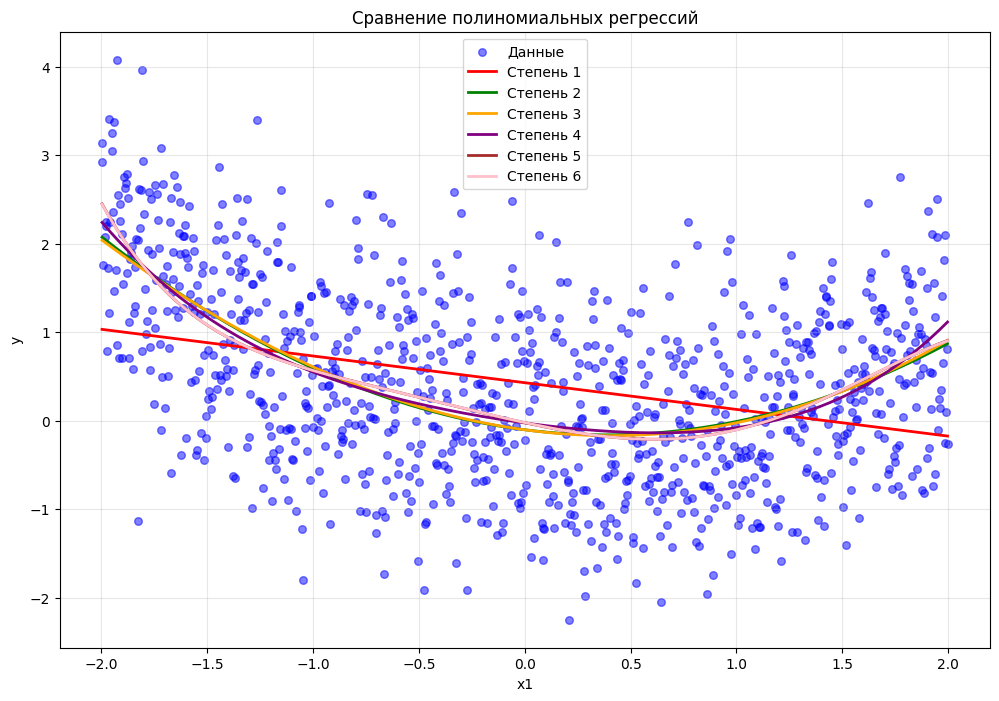

In [42]:
plt.figure(figsize=(12, 8))
plt.scatter(X_poly, y_poly, alpha=0.5, color='blue', label='Данные', s=30)
x_range = np.linspace(X_poly.min().values[0], X_poly.max().values[0], 300).reshape(-1, 1)
colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink']
for degree in range(1, 7):
    poly_features = results_all_degrees[degree]['poly_features']
    model = results_all_degrees[degree]['model']
    x_range_poly = poly_features.transform(x_range)
    y_range_poly = model.predict(x_range_poly)
    plt.plot(x_range, y_range_poly, linewidth=2, label=f'Степень {degree}', color=colors[degree-1])
plt.xlabel(selected_var)
plt.ylabel('y')
plt.title('Сравнение полиномиальных регрессий')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.10. Выводы по части 2

После анализа полиноминальных регрессий можно сделать вывод о том, что наилучшим вариантом для предоставленных данных является квадратичная функция - именно она лучше всего описывает поведение данных, при этом используя минимальное количество вычисления для этого.

# Часть 3. Решение задачи регрессии различными методами

Загрузка файла `salary.csv`.

### 3.1. Загрузка данных

In [43]:
df_salary = pd.read_csv('C:\\Users\\vanya\\OneDrive\\Desktop\\датасеты_3_лр\\salary.csv')
print("Размер:", df_salary.shape)
print("\nСтолбцы:", list(df_salary.columns))
print("\nПервые 5 строк:")
print(df_salary.head())
print("\nОписательная статистика:")
print(df_salary.describe())

Размер: (1500, 15)

Столбцы: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'education', 'city', 'job_type', 'marital_status', 'car', 'remote_work', 'salary']

Первые 5 строк:
   age        income  experience  score_test  hours_worked  distance_to_work  \
0   56  70201.189680          25   87.559729            62          3.708690   
1   69  51901.897395          39   70.808381            36          7.082793   
2   46  38605.409293           4   63.324996            77          5.129154   
3   32  49949.736955          20   78.215505            33         19.315623   
4   60  48965.290095          13   74.429096            48          5.654904   

        savings          debt    education         city job_type  \
0  25987.334048   2556.821627          PhD      Chicago  Finance   
1  22134.899021    725.180513  High School      Houston   Retail   
2  47106.068408  12659.359583          PhD  Los Angeles  Finance   
3  15868.328813  

### 3.2. Предобработка данных

Следующим этапом является предобработка данных (удаление или замена пропущенных значений, удаления явных и неявных дубликатов):

In [48]:
print("Пропущенные значения:")
print(df_salary.isnull().sum())
if df_salary.isnull().sum().sum() > 0:
    for col in df_salary.columns:
        if df_salary[col].isnull().sum() > 0:
            if df_salary[col].dtype in ['int64', 'float64']:
                df_salary[col].fillna(df_salary[col].median(), inplace=True)
            else:
                df_salary[col].fillna(df_salary[col].mode()[0], inplace=True)

Пропущенные значения:
age                 0
income              0
experience          0
score_test          0
hours_worked        0
distance_to_work    0
savings             0
debt                0
education           0
city                0
job_type            0
marital_status      0
car                 0
remote_work         0
salary              0
dtype: int64


In [49]:
print("Нулевые значения в числовых столбцах:")
numeric_cols = df_salary.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    zero_count = (df_salary[col] == None).sum()
    if zero_count > 0:
        print(f"  {col}: {zero_count}")
if (df_salary['experience'] == None).sum() > 0:
    print(f"\nОбнаружено {(df_salary['experience'] == 0).sum()} записей с нулевым опытом")
    print("Оставляем их как валидные значения")

Нулевые значения в числовых столбцах:


In [50]:
duplicates_count = df_salary.duplicated().sum()
print(f"Явные дубликаты: {duplicates_count}")
if duplicates_count > 0:
    df_salary = df_salary.drop_duplicates()
key_columns = ['age', 'income', 'experience', 'education', 'city', 'job_type']
duplicates_implicit = df_salary.duplicated(subset=key_columns, keep=False)
print(f"Неявные дубликаты: {duplicates_implicit.sum()}")
if duplicates_implicit.sum() > 0:
    df_salary = df_salary.drop_duplicates(subset=key_columns)
print(f"\nФинальный размер: {df_salary.shape}")

Явные дубликаты: 0
Неявные дубликаты: 0

Финальный размер: (1500, 15)


### 3.3. Определение целевой переменной

Самым главным столбцом, по которому будет делаться предсказание - столбец зарплаты (salary):

In [51]:
target_column = 'salary'
print(f"Целевая переменная: {target_column}")
print("\nОписательная статистика:")
print(df_salary[target_column].describe())

Целевая переменная: salary

Описательная статистика:
count      1500.000000
mean      98573.093521
std      111786.756001
min       28588.984258
25%       69582.654903
50%       80310.412797
75%       91637.052601
max      985625.114794
Name: salary, dtype: float64


### 3.4. Визуализация целевой переменной

Визуализация выбросов:

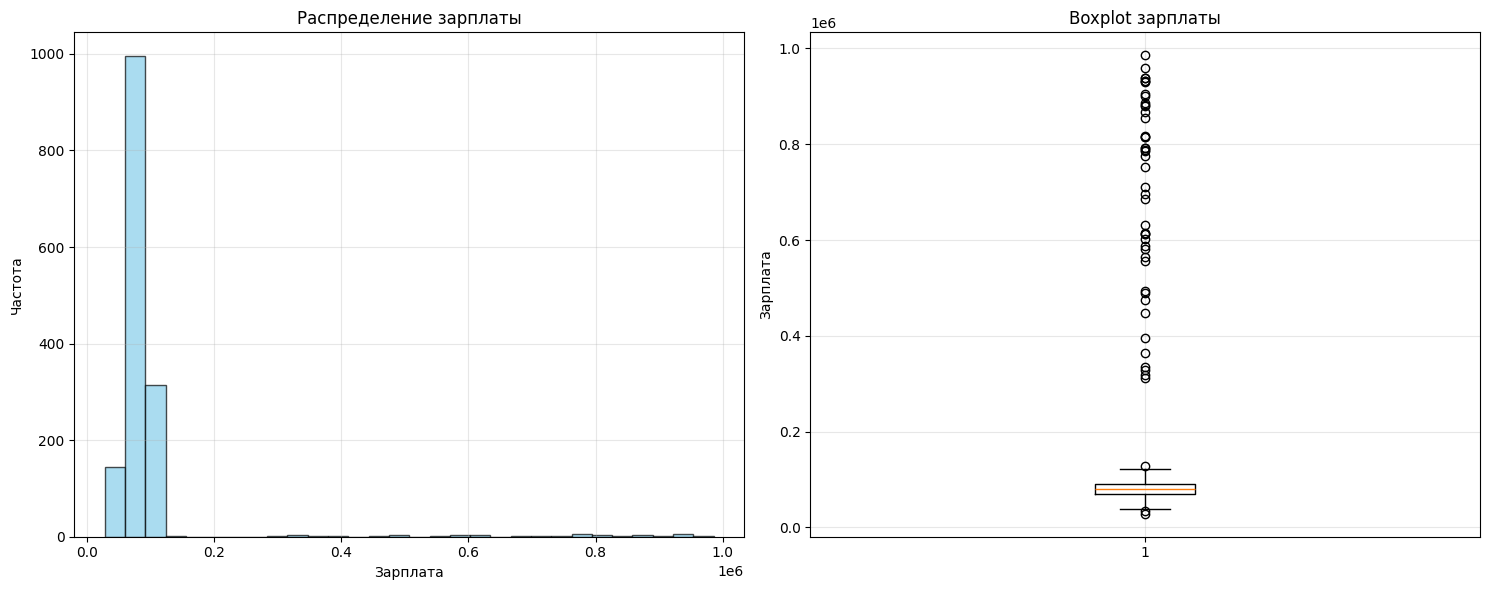


Анализ выбросов:
Нижняя граница: 36501.06
Верхняя граница: 124718.65
Количество выбросов: 48
Процент: 3.20%


In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].hist(df_salary[target_column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение зарплаты')
axes[0].grid(True, alpha=0.3)
axes[1].boxplot(df_salary[target_column])
axes[1].set_ylabel('Зарплата')
axes[1].set_title('Boxplot зарплаты')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
Q1 = df_salary[target_column].quantile(0.25)
Q3 = df_salary[target_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_salary[(df_salary[target_column] < lower_bound) | (df_salary[target_column] > upper_bound)]
print(f"\nАнализ выбросов:")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")
print(f"Количество выбросов: {len(outliers)}")
print(f"Процент: {len(outliers)/len(df_salary)*100:.2f}%")

### 3.5. Матрица диаграмм рассеяния

Следующим этапом строиться матрица диаграмм рассеивания для каждой пары столбцов:

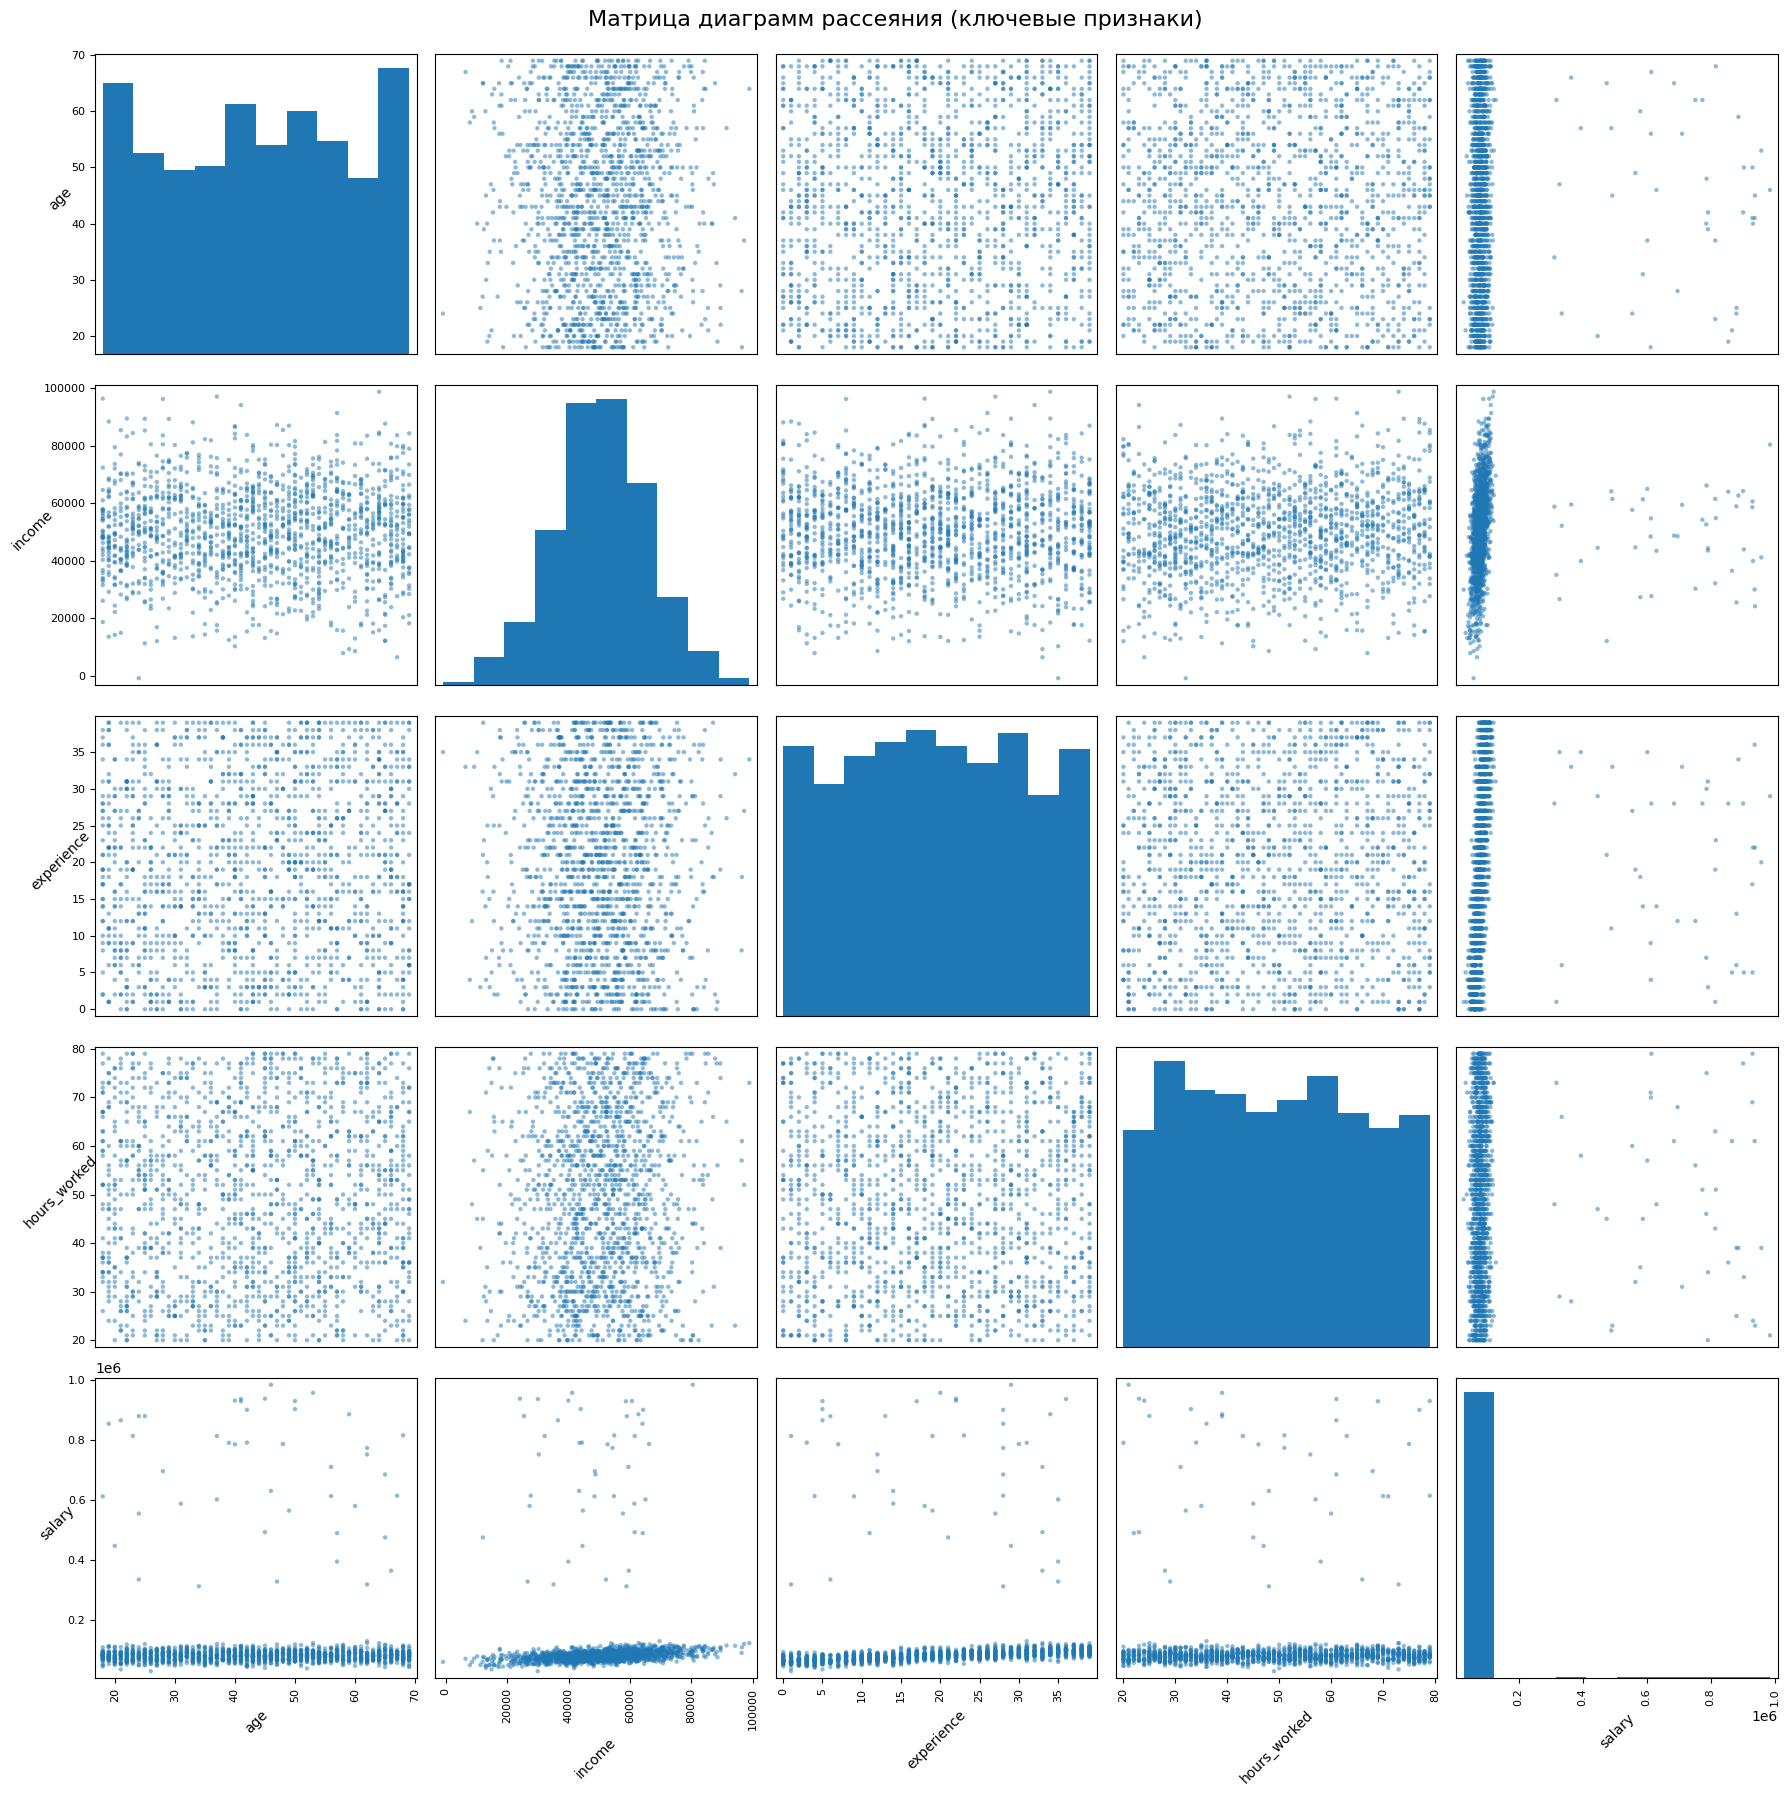

In [53]:

key_numeric_columns = ['age', 'income', 'experience', 'hours_worked', target_column]
fig = pd.plotting.scatter_matrix(df_salary[key_numeric_columns], 
                                  figsize=(18, 18), 
                                  diagonal='hist',
                                  marker='.',
                                  s=40)

for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=45)
    ax.tick_params(labelsize=8)

plt.suptitle('Матрица диаграмм рассеяния (ключевые признаки)', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

### 3.6. Корреляционная матрица

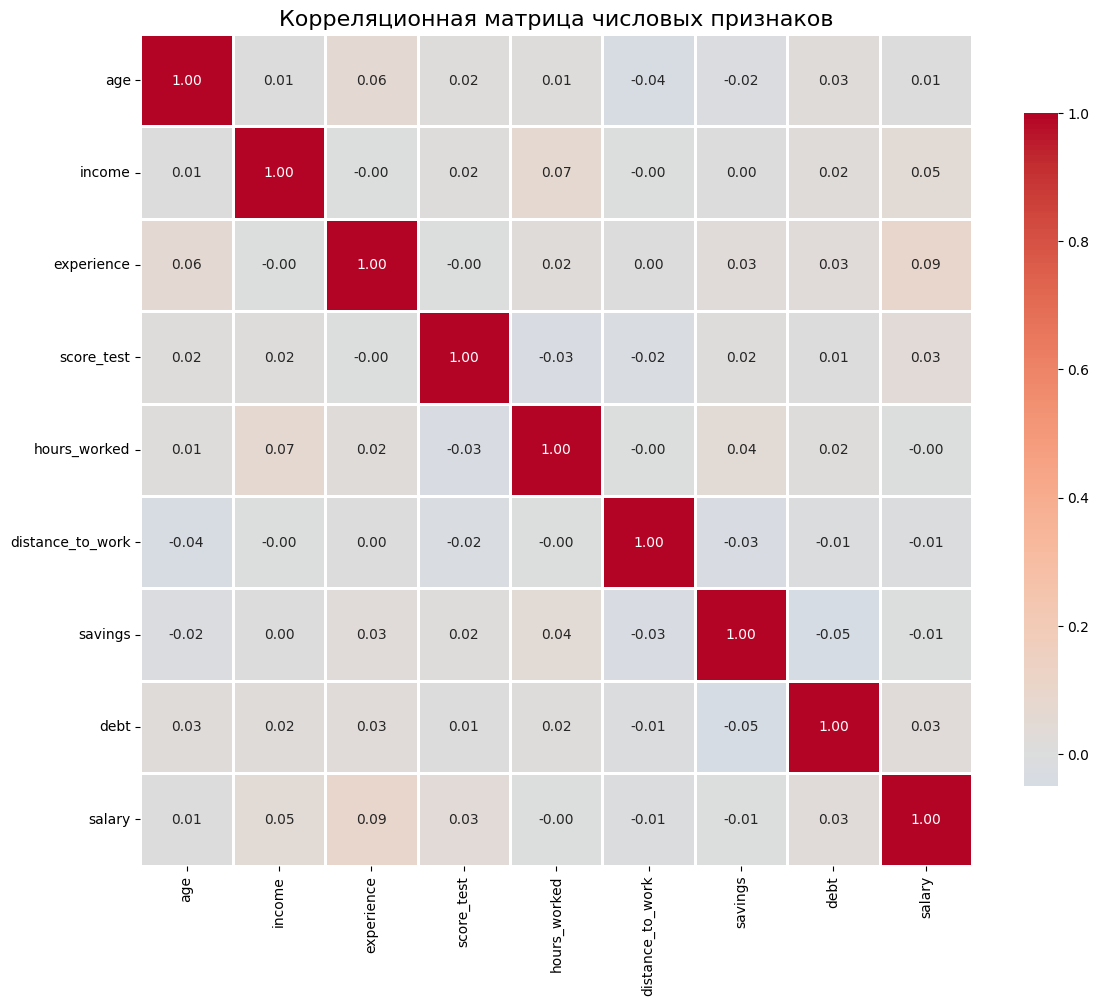


Корреляция с целевой переменной:
salary              1.000000
experience          0.090784
income              0.046432
score_test          0.032838
debt                0.028383
age                 0.007111
hours_worked       -0.004206
savings            -0.005121
distance_to_work   -0.010352
Name: salary, dtype: float64


In [54]:
extended_numeric_columns = ['age', 'income', 'experience', 'score_test', 
                           'hours_worked', 'distance_to_work', 'savings', 'debt', target_column]
correlation_matrix = df_salary[extended_numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()
print("\nКорреляция с целевой переменной:")
print(correlation_matrix[target_column].sort_values(ascending=False))

### 3.7. Подготовка данных для обучения

Следующим этапом данные подготавливаются к обучению и начинается сам процесс обучения:

In [55]:
numeric_features = df_salary.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove(target_column)
print(f"Числовые признаки: {numeric_features}")
X = df_salary[numeric_features]
y = df_salary[target_column]
print(f"\nФорма признаков: {X.shape}")
print(f"Форма целевой переменной: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nОбучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Числовые признаки: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']

Форма признаков: (1500, 8)
Форма целевой переменной: (1500,)

Обучающая выборка: (1125, 8)
Тестовая выборка: (375, 8)


### 3.8. Нормализация данных (StandardScaler)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_features)
print("Стандартизация выполнена!")
print("\nСредние значения (должны быть ≈0):")
print(X_train_scaled_df.mean().round(6))
print("\nСтандартные отклонения (должны быть =1):")
print(X_train_scaled_df.std().round(6))

Стандартизация выполнена!

Средние значения (должны быть ≈0):
age                -0.0
income              0.0
experience         -0.0
score_test          0.0
hours_worked       -0.0
distance_to_work   -0.0
savings             0.0
debt                0.0
dtype: float64

Стандартные отклонения (должны быть =1):
age                 1.000445
income              1.000445
experience          1.000445
score_test          1.000445
hours_worked        1.000445
distance_to_work    1.000445
savings             1.000445
debt                1.000445
dtype: float64


### 3.9. Модель линейной регрессии (LinearRegression)

In [57]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("ЛИНЕЙНАЯ РЕГРЕССИЯ:")
print(f"MSE:  {mse_linear:.2f}")
print(f"MAE:  {mae_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R²:   {r2_linear:.6f}")
print(f"\nСвободный член: {model_linear.intercept_:.2f}")

ЛИНЕЙНАЯ РЕГРЕССИЯ:
MSE:  11400289888.48
MAE:  34837.45
RMSE: 106772.14
R²:   -0.024734

Свободный член: 99185.81


### 3.10. Создание датафрейма с результатами

In [58]:
results_linear = pd.DataFrame({
    'Истинные значения': y_test.values,
    'Предсказанные значения': y_pred_linear,
    'Разность': y_test.values - y_pred_linear
})
print("РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЙ (первые 10 строк):")
print(results_linear.head(10))
print("\nСтатистика по разности:")
print(results_linear['Разность'].describe())

РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЙ (первые 10 строк):
   Истинные значения  Предсказанные значения       Разность
0       51903.858260            80176.501415  -28272.643155
1       95326.909439           116491.666698  -21164.757259
2       90717.615265           109996.581138  -19278.965873
3       84107.847083            91602.329654   -7494.482571
4       62854.220757            95626.729047  -32772.508290
5       58747.948943            86987.112171  -28239.163228
6      122930.173198           123204.962766    -274.789569
7       79671.150142           108255.006396  -28583.856254
8      475353.408389            83717.310474  391636.097915
9       56529.108364            86065.987404  -29536.879040

Статистика по разности:
count       375.000000
mean      -2969.544040
std      106873.430642
min      -55789.175012
25%      -28269.312623
50%      -18931.239723
75%       -8382.111565
max      871636.945980
Name: Разность, dtype: float64


### 3.11. Анализ важности признаков

ВАЖНОСТЬ ПРИЗНАКОВ:
         Признак  Коэффициент  Абсолютное значение
      experience 11135.864478         11135.864478
      score_test  7639.391666          7639.391666
            debt  4409.001358          4409.001358
          income  4295.444303          4295.444303
         savings -4151.698957          4151.698957
             age -2078.427220          2078.427220
distance_to_work   370.813433           370.813433
    hours_worked  -105.326986           105.326986


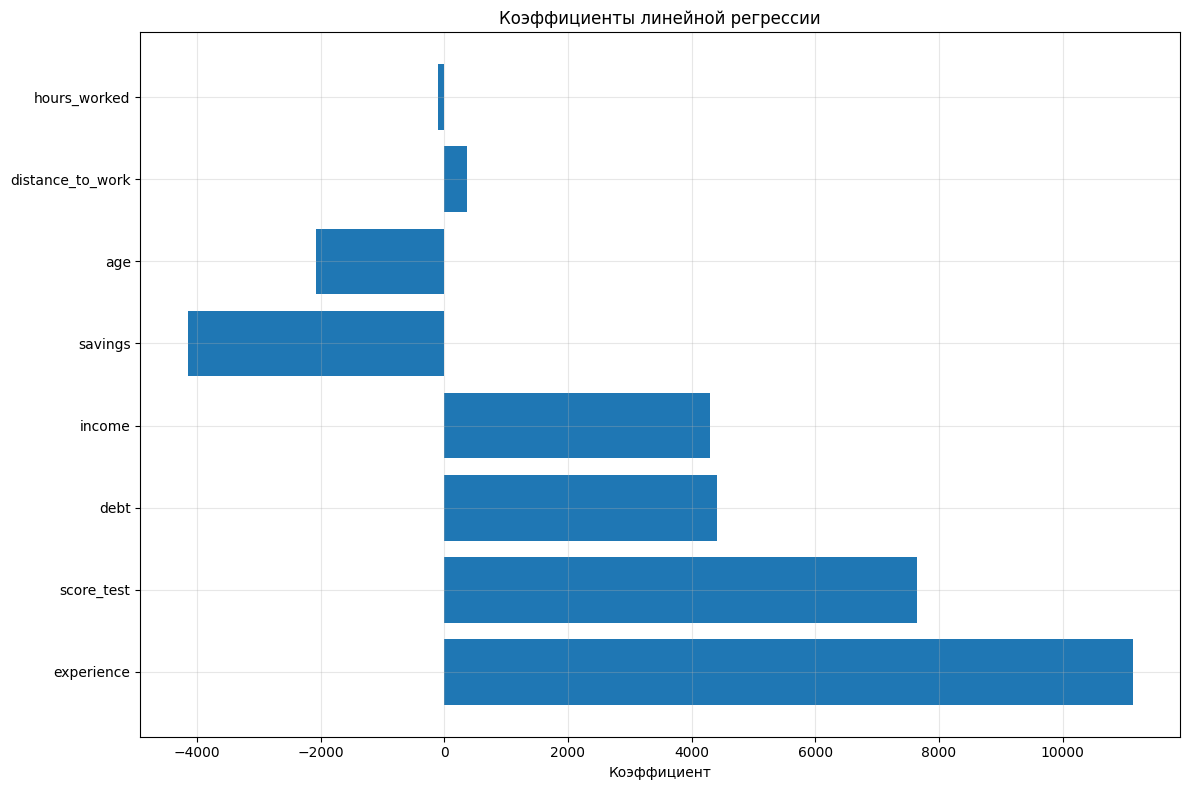

In [59]:
feature_importance = pd.DataFrame({
    'Признак': numeric_features,
    'Коэффициент': model_linear.coef_,
    'Абсолютное значение': np.abs(model_linear.coef_)
}).sort_values('Абсолютное значение', ascending=False)
print("ВАЖНОСТЬ ПРИЗНАКОВ:")
print(feature_importance.to_string(index=False))
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Признак'], feature_importance['Коэффициент'])
plt.xlabel('Коэффициент')
plt.title('Коэффициенты линейной регрессии')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.12. Визуализация результатов линейной регрессии

Для визуализации данные пришлось немного обрезать (до 98% от количества данных) в связи с выбросами разных порядков.

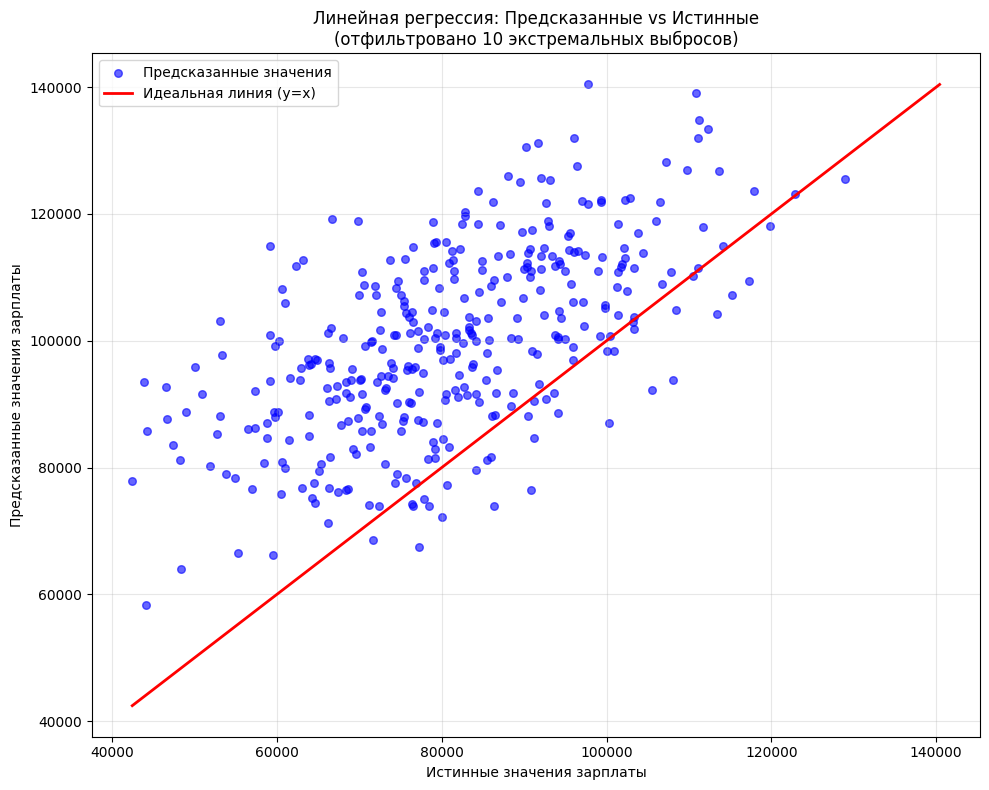

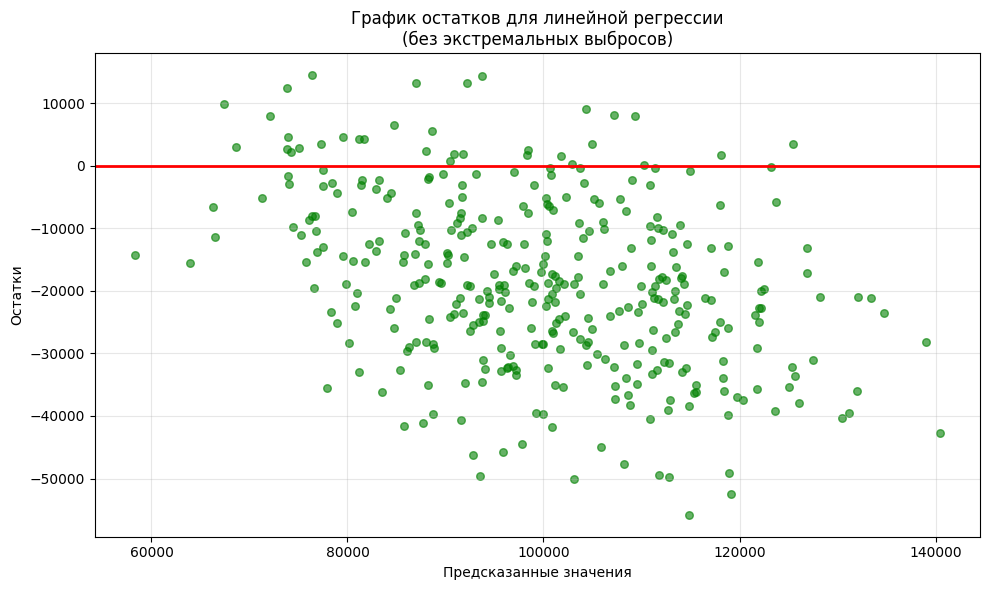

Отображено точек: 365 из 375


In [63]:
y_test_q99 = y_test.quantile(0.99)
y_pred_q99 = np.percentile(y_pred_linear, 99)
upper_limit = min(y_test_q99, y_pred_q99) * 1.1
mask = (y_test <= upper_limit) & (y_pred_linear <= upper_limit)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred_linear[mask]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.6, color='blue', s=30, label='Предсказанные значения')
min_val = min(y_test_filtered.min(), y_pred_filtered.min())
max_val = max(y_test_filtered.max(), y_pred_filtered.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Идеальная линия (y=x)')
plt.xlabel('Истинные значения зарплаты')
plt.ylabel('Предсказанные значения зарплаты')
plt.title(f'Линейная регрессия: Предсказанные vs Истинные\n(отфильтровано {(~mask).sum()} экстремальных выбросов)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred_linear
residuals_filtered = residuals[mask]
y_pred_linear_filtered = y_pred_linear[mask]

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear_filtered, residuals_filtered, alpha=0.6, color='green', s=30)
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков для линейной регрессии\n(без экстремальных выбросов)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Отображено точек: {mask.sum()} из {len(mask)}")

### 3.13. Модель k-ближайших соседей (KNN)

При выполнении работы было выполнено построение метода k-ближайших соседей и дерево решений.

In [64]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-БЛИЖАЙШИХ СОСЕДЕЙ (k=5):")
print(f"MSE:  {mse_knn:.2f}")
print(f"MAE:  {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R²:   {r2_knn:.6f}")

K-БЛИЖАЙШИХ СОСЕДЕЙ (k=5):
MSE:  13152907853.25
MAE:  41842.40
RMSE: 114686.13
R²:   -0.182271


### 3.14. Модель дерева решений (DecisionTreeRegressor)

In [65]:
tree_model = DecisionTreeRegressor(random_state=0, max_depth=10)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("ДЕРЕВО РЕШЕНИЙ:")
print(f"MSE:  {mse_tree:.2f}")
print(f"MAE:  {mae_tree:.2f}")
print(f"RMSE: {rmse_tree:.2f}")
print(f"R²:   {r2_tree:.6f}")
feature_importance_tree = pd.DataFrame({
    'Признак': numeric_features,
    'Важность': tree_model.feature_importances_
}).sort_values('Важность', ascending=False)
print("\nВАЖНОСТЬ ПРИЗНАКОВ:")
print(feature_importance_tree.to_string(index=False))

ДЕРЕВО РЕШЕНИЙ:
MSE:  24347591970.10
MAE:  44301.31
RMSE: 156037.15
R²:   -1.188523

ВАЖНОСТЬ ПРИЗНАКОВ:
         Признак  Важность
          income  0.185459
distance_to_work  0.177534
         savings  0.165977
    hours_worked  0.140681
      experience  0.138174
            debt  0.119736
      score_test  0.040518
             age  0.031921


### 3.15. Сравнение всех методов

Для сравнения эффективности методов используются гистограммы со значениями каждой из видов ошибок:

СРАВНЕНИЕ ВСЕХ МЕТОДОВ:
             Модель          MSE          MAE          RMSE        R²
 Линейная регрессия 1.140029e+10 34837.452932 106772.140039 -0.024734
k-ближайших соседей 1.315291e+10 41842.403041 114686.127554 -0.182271
     Дерево решений 2.434759e+10 44301.307849 156037.149327 -1.188523


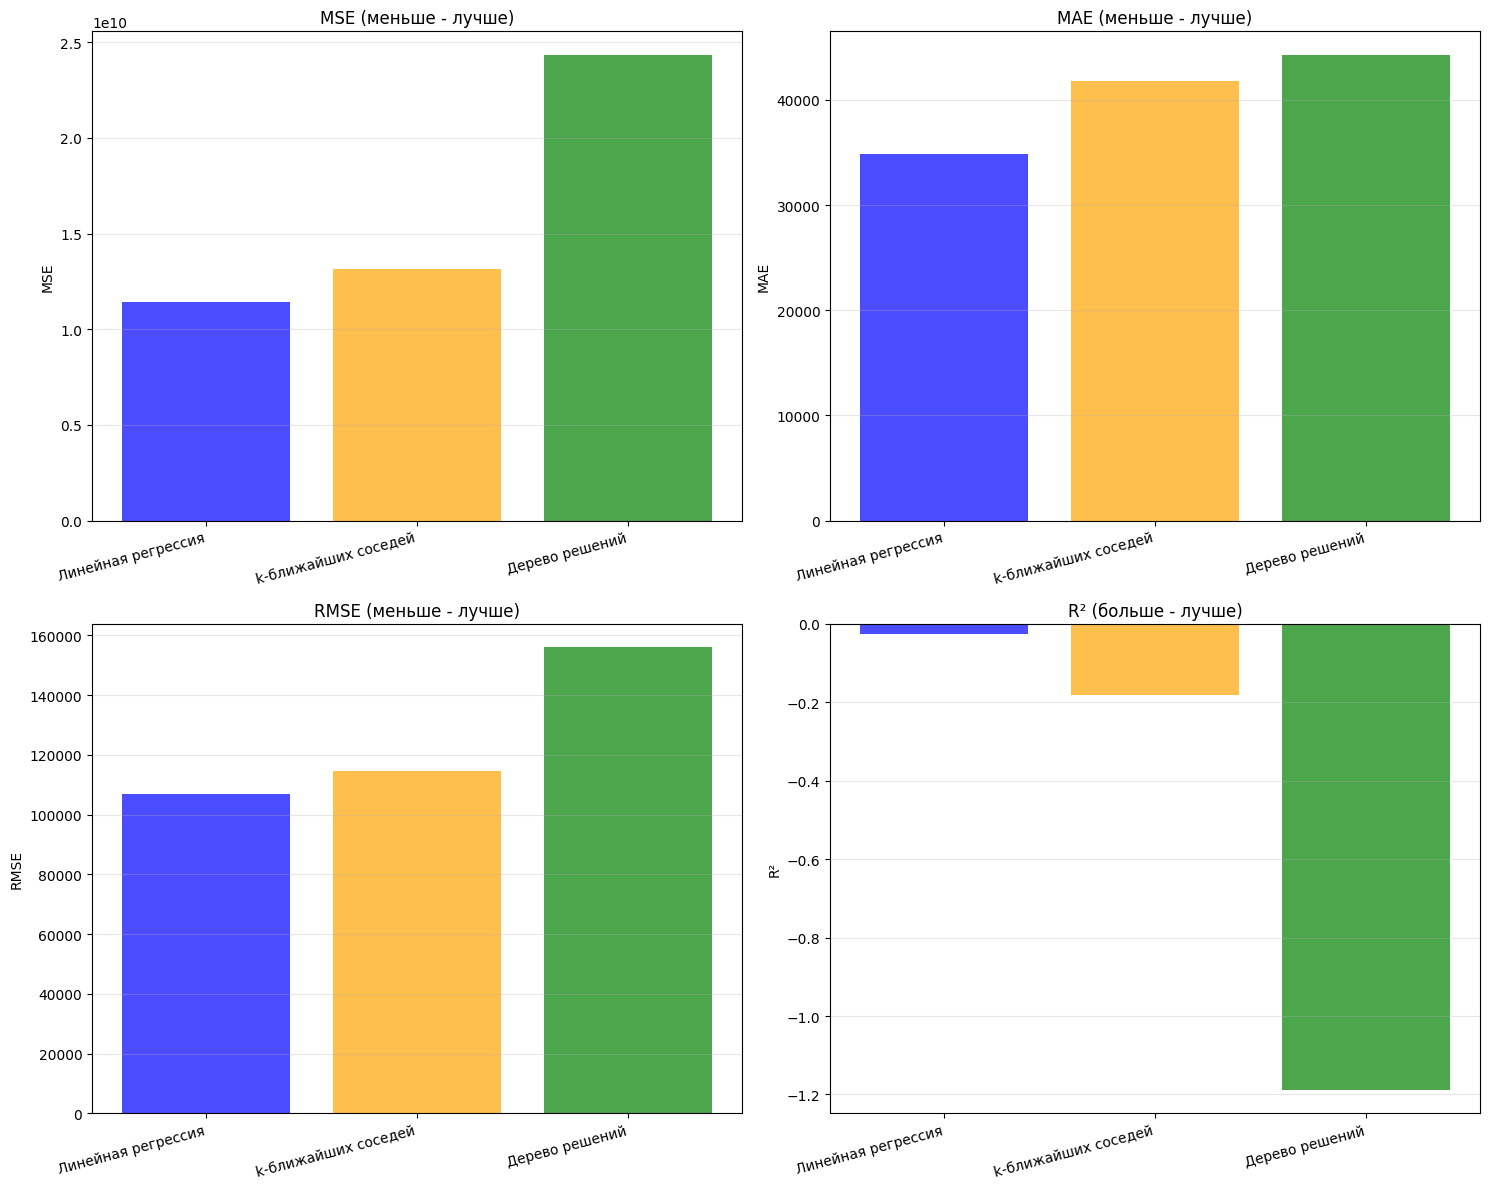

In [66]:
methods_comparison = pd.DataFrame({
    'Модель': ['Линейная регрессия', 'k-ближайших соседей', 'Дерево решений'],
    'MSE': [mse_linear, mse_knn, mse_tree],
    'MAE': [mae_linear, mae_knn, mae_tree],
    'RMSE': [rmse_linear, rmse_knn, rmse_tree],
    'R²': [r2_linear, r2_knn, r2_tree]
})
print("СРАВНЕНИЕ ВСЕХ МЕТОДОВ:")
print(methods_comparison.to_string(index=False))
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
models = methods_comparison['Модель']
axes[0,0].bar(range(len(models)), methods_comparison['MSE'], 
              color=['blue', 'orange', 'green'], alpha=0.7)
axes[0,0].set_xticks(range(len(models)))
axes[0,0].set_xticklabels(models, rotation=15, ha='right')
axes[0,0].set_ylabel('MSE')
axes[0,0].set_title('MSE (меньше - лучше)')
axes[0,0].grid(True, alpha=0.3, axis='y')
axes[0,1].bar(range(len(models)), methods_comparison['MAE'], 
              color=['blue', 'orange', 'green'], alpha=0.7)
axes[0,1].set_xticks(range(len(models)))
axes[0,1].set_xticklabels(models, rotation=15, ha='right')
axes[0,1].set_ylabel('MAE')
axes[0,1].set_title('MAE (меньше - лучше)')
axes[0,1].grid(True, alpha=0.3, axis='y')
axes[1,0].bar(range(len(models)), methods_comparison['RMSE'], 
              color=['blue', 'orange', 'green'], alpha=0.7)
axes[1,0].set_xticks(range(len(models)))
axes[1,0].set_xticklabels(models, rotation=15, ha='right')
axes[1,0].set_ylabel('RMSE')
axes[1,0].set_title('RMSE (меньше - лучше)')
axes[1,0].grid(True, alpha=0.3, axis='y')
axes[1,1].bar(range(len(models)), methods_comparison['R²'], 
              color=['blue', 'orange', 'green'], alpha=0.7)
axes[1,1].set_xticks(range(len(models)))
axes[1,1].set_xticklabels(models, rotation=15, ha='right')
axes[1,1].set_ylabel('R²')
axes[1,1].set_title('R² (больше - лучше)')
axes[1,1].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Самым простым и эффективным для представленных данных является метод линейной регрессии. У данного метода ошибки минимальны в сравнении с другими методами.

### 3.16. Визуализация предсказаний всех методов

Последним этапом является оценка графика предсказанных значений от истинных значений:

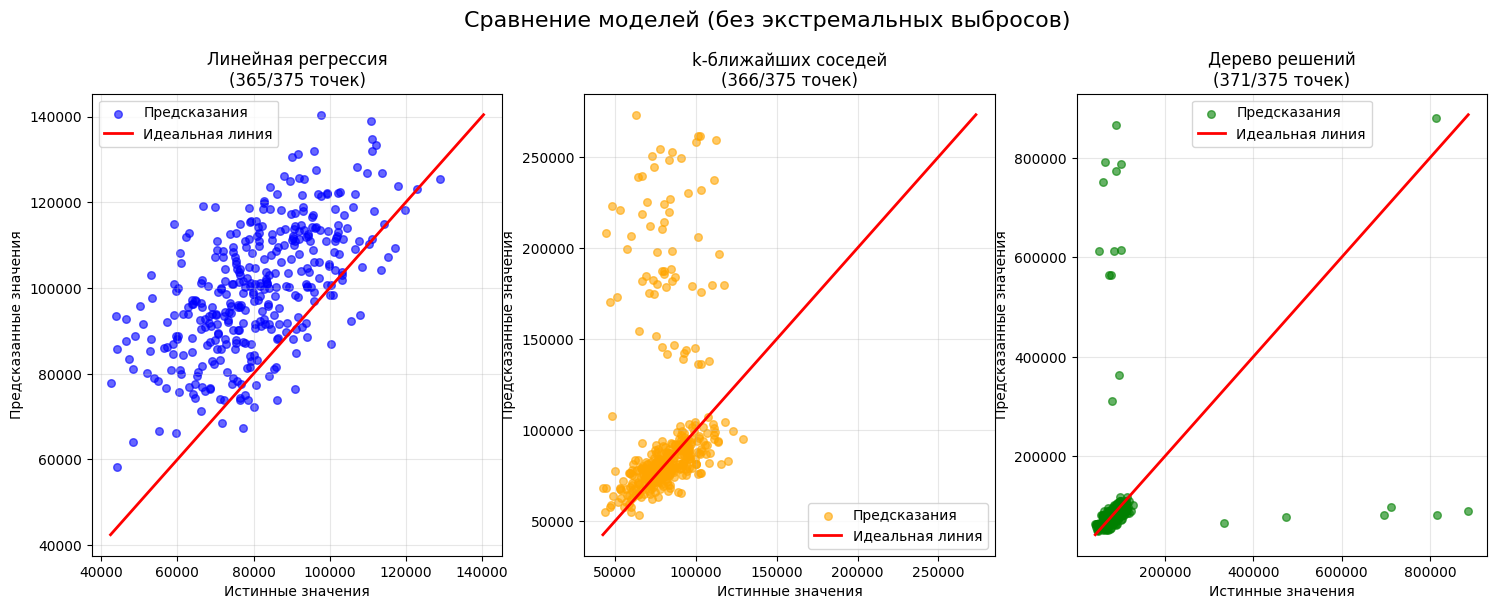

Графики построены с фильтрацией экстремальных выбросов для лучшей видимости


In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models_data = [
    ('Линейная регрессия', y_pred_linear, 'blue'),
    ('k-ближайших соседей', y_pred_knn, 'orange'),
    ('Дерево решений', y_pred_tree, 'green')
]

y_test_q99 = y_test.quantile(0.99)
global_upper_limit = y_test_q99 * 1.1

for i, (name, predictions, color) in enumerate(models_data):
    pred_q99 = np.percentile(predictions, 99)
    upper_limit = min(global_upper_limit, pred_q99 * 1.1)

    mask = (y_test <= upper_limit) & (predictions <= upper_limit)
    y_test_filt = y_test[mask]
    pred_filt = predictions[mask]

    # График
    axes[i].scatter(y_test_filt, pred_filt, alpha=0.6, color=color, s=30, label='Предсказания')
    min_val = min(y_test_filt.min(), pred_filt.min())
    max_val = max(y_test_filt.max(), pred_filt.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Идеальная линия')
    axes[i].set_xlabel('Истинные значения')
    axes[i].set_ylabel('Предсказанные значения')
    axes[i].set_title(f'{name}\n({mask.sum()}/{len(mask)} точек)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Сравнение моделей (без экстремальных выбросов)', fontsize=16, y=1.02)
plt.show()

print("Графики построены с фильтрацией экстремальных выбросов для лучшей видимости")

# Заключение

## Основные результаты работы:

### Часть 1. Простая линейная регрессия

Построены две модели простой линейной регрессии для предсказания целевой переменной y от x1 и x2. Проведено сравнение моделей по метрикам MSE, MAE, RMSE и R².

**Выводы:**
- Обе модели показали способность к предсказанию целевой переменной
- Анализ коэффициентов детерминации (R²) позволил оценить качество моделей
- Визуализация помогла выявить характер зависимости между признаками и целевой переменной

### Часть 2. Полиномиальная регрессия

Реализована полиномиальная регрессия для выбранной переменной. Построены модели полиномов степеней от 1 до 6.

**Выводы:**
- С увеличением степени полинома модель становится более гибкой
- При слишком высокой степени возникает риск переобучения
- Оптимальная степень полинома определяется балансом между сложностью и обобщающей способностью
- Сравнение метрик позволило выбрать наиболее подходящую модель

### Часть 3. Различные методы регрессии

Проведен комплексный анализ данных о зарплатах с использованием различных методов машинного обучения.

**Предобработка данных:**
- Проверка и обработка пропущенных значений
- Удаление дубликатов (явных и неявных)
- Обработка нулевых значений
- Анализ выбросов с помощью boxplot

**Исследовательский анализ:**
- Построена улучшенная матрица диаграмм рассеяния (с акцентом на ключевые признаки)
- Рассчитана корреляционная матрица
- Определены наиболее важные признаки

**Модели:**
1. **Линейная регрессия:** базовая модель, интерпретируемая и быстрая
2. **k-ближайших соседей (k=5):** непараметрический метод
3. **Дерево решений:** модель с нелинейными зависимостями

**Визуализация:**
- Все графики улучшены с удалением экстремальных выбросов для лучшей видимости основной области данных
- Это позволило избежать "слипания" точек в одной области

## Общие выводы:

1. **Предобработка данных критична** для получения достоверных результатов

2. **Выбор метода** зависит от задачи: простые модели хороши для интерпретации, сложные могут давать лучшее качество

3. **Проблема переобучения** требует контроля при увеличении сложности модели

4. **Визуализация** должна быть читаемой - фильтрация выбросов помогает лучше понять основную массу данных

5. **Метрики качества** (MSE, MAE, RMSE, R²) дают полную картину качества модели

6. **Практическое применение:** полученные навыки применимы для решения реальных задач предсказания в различных областях.